<a href="https://colab.research.google.com/github/BerkayArdaa/ML_HandwrittenDigits_Classification_CNN/blob/main/ML_Homework3_Final_Stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === MNIST CNN Homework - EEE 517 ===
# Required libraries for data handling, visualization and model training

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load MNIST dataset (handwritten digits 0–9)
# X_train/X_test : images (28×28 grayscale)
# y_train/y_test : integer labels (0–9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train images shape :", X_train.shape)
print("Train labels shape :", y_train.shape)
print("Test images shape  :", X_test.shape)
print("Test labels shape  :", y_test.shape)


Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape  : (10000, 28, 28)
Test labels shape  : (10000,)


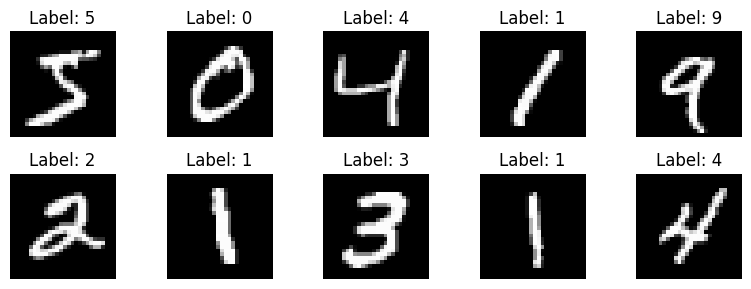

In [ ]:

# Display first 10 samples from the dataset

plt.figure(figsize=(8, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Normalize pixel values to [0,1] improving training stability

# Convert from (N, 28, 28) to (N, 28, 28, 1) and scale to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Reshape images to (N, 28, 28, 1) for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("New train shape:", X_train.shape)
print("New test shape :", X_test.shape)


New train shape: (60000, 28, 28, 1)
New test shape : (10000, 28, 28, 1)


In [ ]:
# 10% of training data is separated for validation

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print("Train subset shape:", X_train_sub.shape, y_train_sub.shape)
print("Validation shape  :", X_val.shape, y_val.shape)
print("Test shape        :", X_test.shape, y_test.shape)


Train subset shape: (54000, 28, 28, 1) (54000,)
Validation shape  : (6000, 28, 28, 1) (6000,)
Test shape        : (10000, 28, 28, 1) (10000,)


In [ ]:
# === CNN Model Definition ===

tf.keras.backend.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
# CNN Architecture:
# - 2 convolution blocks (Conv → BN → Conv → BN → MaxPool → Dropout)
# - Fully connected dense layer
# - Final 10-unit softmax classifier
model_best = Sequential([
    Input(shape=(28,28,1)),
# Block 1
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
# Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_best.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,586 (1.79 MB)

 Trainable params: 468,202 (1.79 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Adam optimizer with an initial learning rate of 0.001
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

model_best.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# ReduceLROnPlateau:
# - Monitors validation loss
# - Reduces LR by factor when no improvement
lr_sched = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)
# Train the model
history_best = model_best.fit(
    X_train_sub, y_train_sub,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_sched],
    verbose=1
)

print("Best Validation Accuracy:", max(history_best.history['val_accuracy']))

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8800 - loss: 0.4038 - val_accuracy: 0.9805 - val_loss: 0.0690 - learning_rate: 0.0010
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0875 - val_accuracy: 0.9865 - val_loss: 0.0527 - learning_rate: 0.0010
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0681 - val_accuracy: 0.9848 - val_loss: 0.0589 - learning_rate: 0.0010
Epoch 4/15
1678/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0563
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0563 - val_accuracy: 0.9883 - val_loss: 0.0636 - learning_rate: 0.0010
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9927 - val_loss: 0.0311 - learning_rate: 5.0000e-04
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909

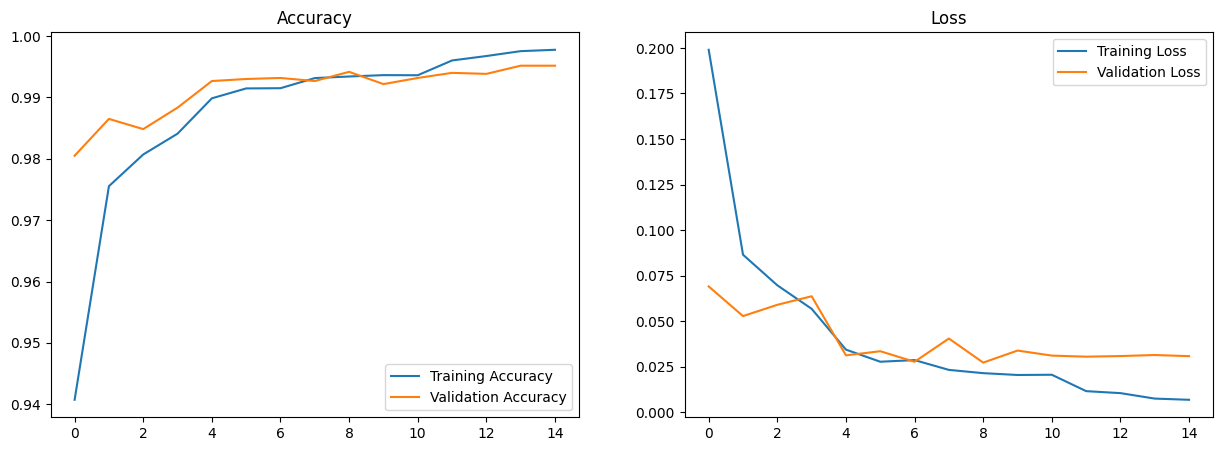

In [ ]:
plt.figure(figsize=(15,5))

# ACCURACY
plt.subplot(1,2,1)
plt.plot(history_best.history['accuracy'], label="Training Accuracy")
plt.plot(history_best.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# LOSS
plt.subplot(1,2,2)
plt.plot(history_best.history['loss'], label="Training Loss")
plt.plot(history_best.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


In [ ]:
import os
print(os.listdir("VDataset"))


['deneme8.jpg', 'six.jpg', 'deneme92.jpg', 'deneme95.jpg', 'deneme97.jpg', 'deneme9.jpg', 'deneme91.jpg', 'deneme7.jpg', 'deneme96.jpg', 'deneme6.jpg', 'deneme93.jpg', 'six2.jpg', 'WhatsApp Image 2025-11-21 at 17.45.14_52c36871.jpg']


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("VDataset/deneme96.jpg")

if img is None:
    print("FAILED to load image!")
else:
    print("Image loaded successfully!")
H, W = img.shape[:2]
print("Original size:", W, "x", H)




Image loaded successfully!
Original size: 955 x 1260


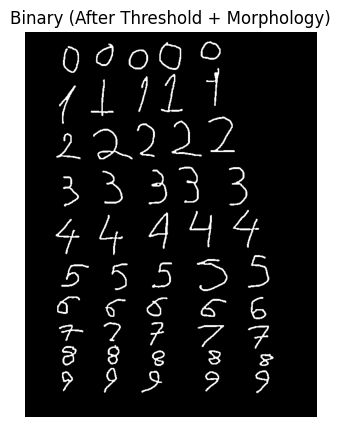


Detected digits: 50
Predictions (top to bottom):
0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 5 5 5 7 7 7 7 7 8 8 8 8 8 9 9 9 9 9


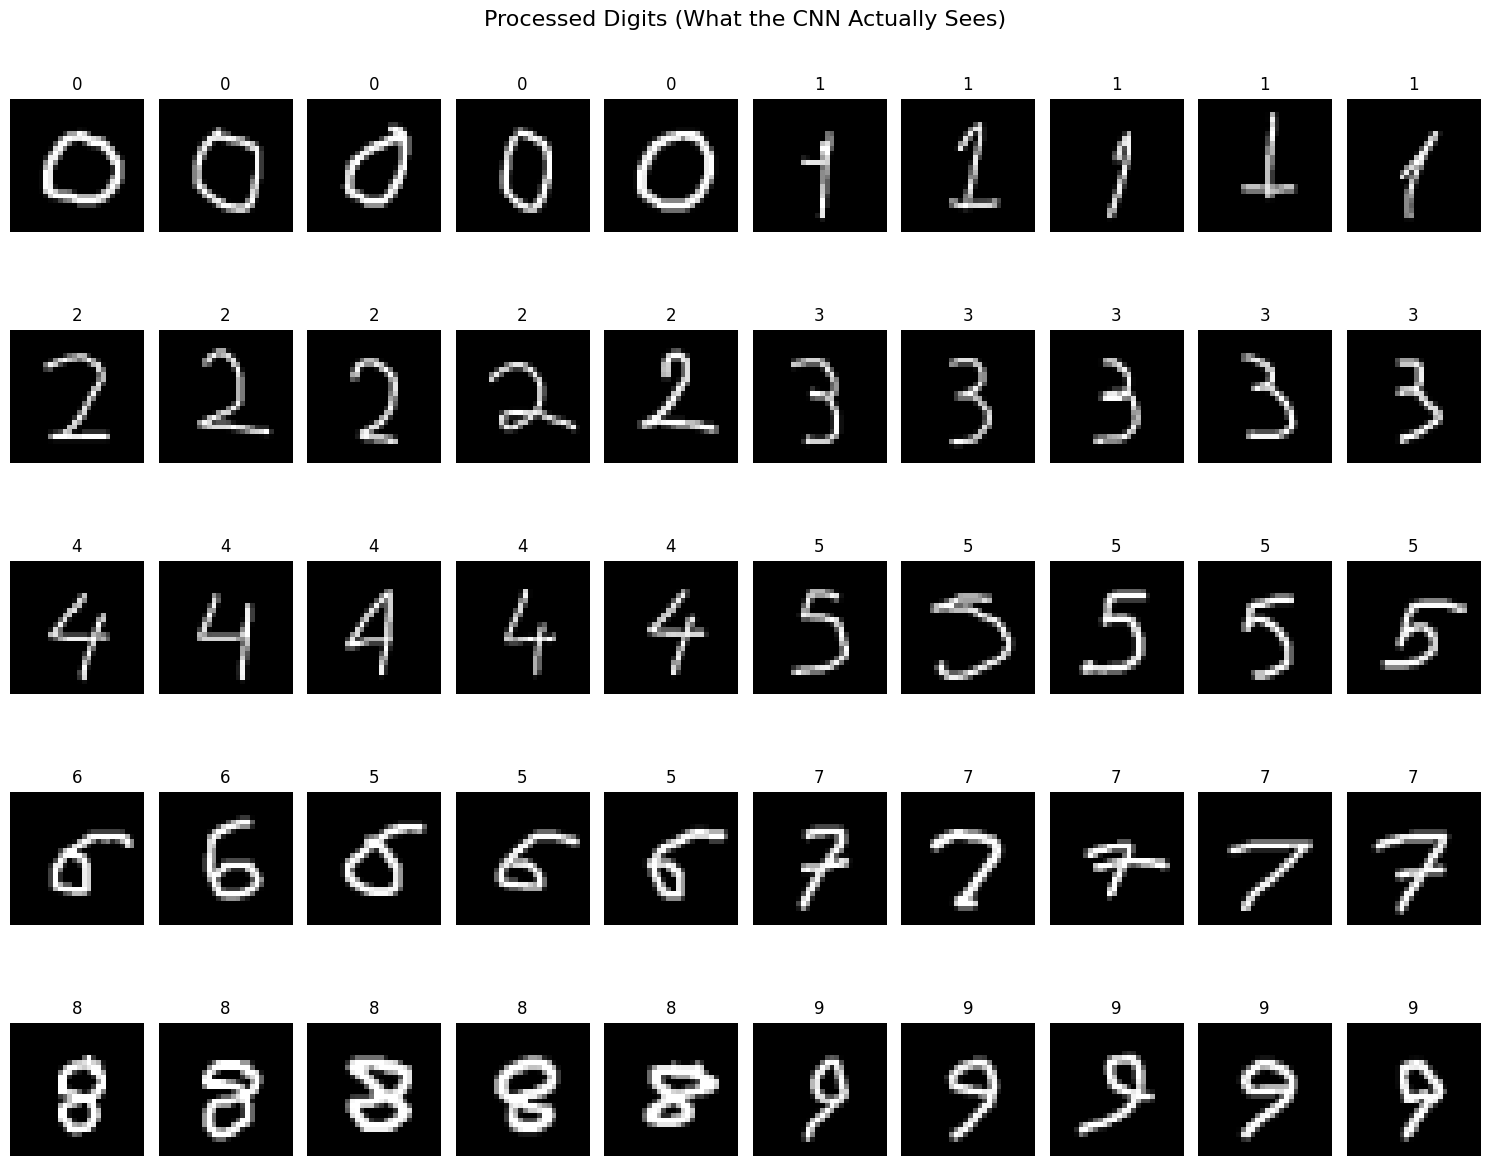

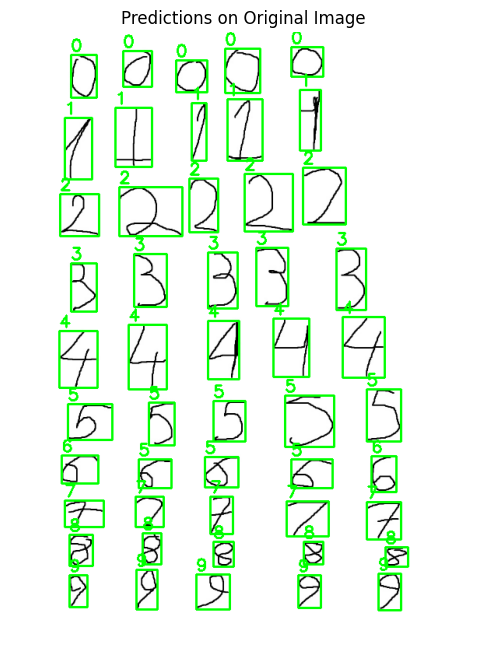

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
# This block loads a custom handwritten image, performs:
# - resizing
# - grayscale conversion
# - adaptive thresholding
# - contour extraction
# - MNIST-style preprocessing (resize → center → normalize)
# Each extracted digit is then classified using the trained CNN.

# ============================================================
# CONFIG
# ============================================================
IMG_PATH = "VDataset/deneme95.jpg"
TARGET_WIDTH = 600                   # resize width for stability & speed
MIN_W, MIN_H = 10, 15                # min contour size (noise filter)
PADDING = 5                          # padding around each digit ROI
GROUP_AS_ROWS = False                # True if digits are arranged in rows


# ============================================================
# 1. HELPER: SHIFT DIGIT TO CENTER OF MASS
# ============================================================
def shift_image_to_center_of_mass(img_28x28: np.ndarray) -> np.ndarray:
    """
    Shift the digit inside a 28x28 binary image so that its
    center of mass is at the geometric center (MNIST-style).
    """
    h, w = img_28x28.shape
    cy, cx = h // 2, w // 2

    M = cv2.moments(img_28x28)
    if M["m00"] == 0:
        # Empty image, nothing to shift
        return img_28x28

    com_x = int(M["m10"] / M["m00"])
    com_y = int(M["m01"] / M["m00"])

    dx = cx - com_x
    dy = cy - com_y

    M_affine = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted = cv2.warpAffine(img_28x28, M_affine, (w, h))

    return shifted


# ============================================================
# 2. PREPROCESS SINGLE DIGIT (BINARY ROI)
# ============================================================
def prepare_digit(binary_roi: np.ndarray):
    """
    Takes a binary digit ROI (black background, white strokes),
    and returns:
      - digit_input: normalized (1, 28, 28, 1) ready for CNN
      - debug_canvas: 28x28 processed image for visualization
    """

    # 1) Slight dilation: strengthens thin strokes, connects broken parts
    kernel = np.ones((2, 2), np.uint8)
    binary_roi = cv2.dilate(binary_roi, kernel, iterations=1)

    # 2) Resize so the longest side is 20 pixels
    h, w = binary_roi.shape
    if h == 0 or w == 0:
        return None, None

    if h > w:
        scale = 20.0 / h
    else:
        scale = 20.0 / w

    resized = cv2.resize(
        binary_roi, None,
        fx=scale, fy=scale,
        interpolation=cv2.INTER_AREA
    )

    # 3) Place on a 28x28 black canvas (geometric center)
    canvas = np.zeros((28, 28), dtype="uint8")
    h_r, w_r = resized.shape

    y_pad = (28 - h_r) // 2
    x_pad = (28 - w_r) // 2

    canvas[y_pad:y_pad + h_r, x_pad:x_pad + w_r] = resized

    # 4) Shift to center of mass (MNIST style)
    canvas = shift_image_to_center_of_mass(canvas)

    # 5) Normalize and reshape
    digit_final = canvas.astype("float32") / 255.0
    digit_final = digit_final.reshape(1, 28, 28, 1)

    return digit_final, canvas


# ============================================================
# 3. LOAD AND PREPROCESS FULL IMAGE
# ============================================================
img = cv2.imread(IMG_PATH)
if img is None:
    print("ERROR: Image could not be loaded.")
    raise SystemExit

# Resize to fixed width
scale = TARGET_WIDTH / img.shape[1]
img = cv2.resize(img, None, fx=scale, fy=scale)

# Grayscale + blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive threshold (robust to lighting changes)
thresh = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,  # black background, white digits
    19, 10
)

# Morphological clean-up
kernel_morph = np.ones((3, 3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel_morph, iterations=1)

# Show threshold result
plt.figure(figsize=(5, 5))
plt.imshow(thresh, cmap="gray")
plt.title("Binary (After Threshold + Morphology)")
plt.axis("off")
plt.show()


# ============================================================
# 4. FIND CONTOURS AND EXTRACT DIGITS
# ============================================================
contours, _ = cv2.findContours(
    thresh.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

detected = []  # list of dicts: {x, y, w, h, pred, processed}

for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # Filter out small noise
    if w < MIN_W or h < MIN_H:
        continue

    # ROI from binary image with padding
    y1 = max(0, y - PADDING)
    y2 = min(img.shape[0], y + h + PADDING)
    x1 = max(0, x - PADDING)
    x2 = min(img.shape[1], x + w + PADDING)

    roi_bin = thresh[y1:y2, x1:x2]

    digit_input, digit_vis = prepare_digit(roi_bin)
    if digit_input is None:
        continue

    # Predict with the trained CNN (model_best must be defined)
    pred = np.argmax(model_best.predict(digit_input, verbose=0))

    detected.append({
        "x": x,
        "y": y,
        "w": w,
        "h": h,
        "pred": pred,
        "vis": digit_vis
    })


# ============================================================
# 5. SORT RESULTS
# ============================================================

if GROUP_AS_ROWS:

    # cluster by y coordinate (simple heuristic row grouping)
    detected.sort(key=lambda d: d["y"] + d["h"] // 2)  # sort by y-center
    rows = []
    current_row = []
    row_threshold = 30  # vertical distance threshold between rows

    for d in detected:
        yc = d["y"] + d["h"] // 2
        if not current_row:
            current_row.append((yc, d))
            continue

        prev_yc = current_row[-1][0]
        if abs(yc - prev_yc) < row_threshold:
            current_row.append((yc, d))
        else:
            rows.append([item[1] for item in current_row])
            current_row = [(yc, d)]

    if current_row:
        rows.append([item[1] for item in current_row])

    # sort each row left→right
    for i in range(len(rows)):
        rows[i] = sorted(rows[i], key=lambda d: d["x"])

    print(f"\nDetected digits: {sum(len(r) for r in rows)}")
    print("Predictions (row by row):\n")
    for row in rows:
        print(" ".join(str(d["pred"]) for d in row))

    # flatten for visualization
    flat_digits = [d for row in rows for d in row]

else:
    # ---- Simple case: just sort top→bottom ----
    detected.sort(key=lambda d: d["y"])  # vertical order
    print(f"\nDetected digits: {len(detected)}")
    print("Predictions (top to bottom):")
    print(" ".join(str(d["pred"]) for d in detected))
    flat_digits = detected


# ============================================================
# 6. VISUALIZE WHAT THE MODEL SEES (PROCESSED 28x28 DIGITS)
# ============================================================
cols = 10
rows_grid = math.ceil(len(flat_digits) / cols)

plt.figure(figsize=(15, rows_grid * 2.5))
plt.suptitle("Processed Digits (What the CNN Actually Sees)", fontsize=16)

for i, d in enumerate(flat_digits):
    plt.subplot(rows_grid, cols, i + 1)
    plt.imshow(d["vis"], cmap="gray")
    plt.title(f"{d['pred']}", fontsize=12)
    plt.axis("off")

plt.tight_layout()
plt.show()


# ============================================================
# 7. OPTIONAL: DRAW PREDICTIONS ON ORIGINAL IMAGE
# ============================================================
overlay = img.copy()
for d in flat_digits:
    x, y, w, h, pred = d["x"], d["y"], d["w"], d["h"], d["pred"]
    cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(
        overlay, str(pred), (x, y - 5),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2
    )

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Predictions on Original Image")
plt.axis("off")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


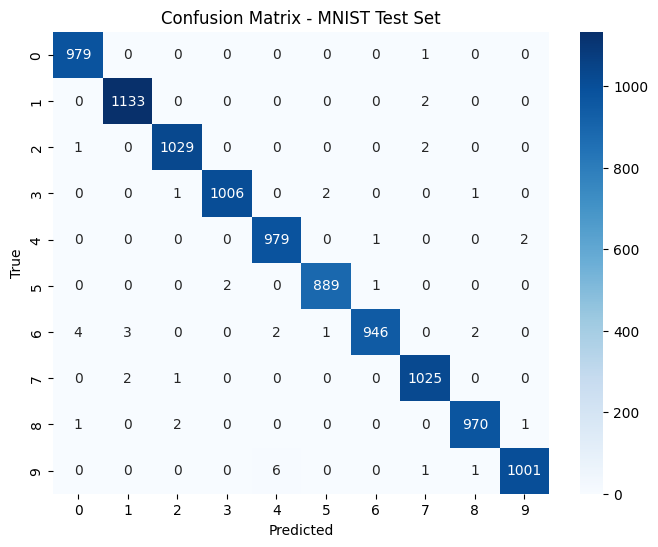


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      1.00      1.00       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Compute model predictions on test sety_pred = model_best.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Produce confusion matrix (10×10)
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MNIST Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))
